In [1]:
import time 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [2]:
# Parameters
tickers = ["LYV", "AMC", "AMZN", "NFLX", "DRI", "RUTH", "DAL", "AAL"]
precovid_date = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid_date = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"
dfs = []

for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid_date}&period2={postcovid_date}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker
    df['Date'] = pd.to_datetime(df['Date'])  
    dfs.append(df)
combined_df = pd.concat(dfs)
combined_df['Daily Trade Value'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]
#Saving date time formated df
datetime_combined_df = combined_df
datetime_combined_df['Year'] = datetime_combined_df['Date'].dt.year.astype(int)
combined_df['Date'] = pd.to_datetime(combined_df['Date']).astype(np.int64)

In [3]:
#create pre and post covid data frames
precovid_df = combined_df.loc[combined_df['Date'].values <= 1577750400000000000]
postcovid_df = combined_df.loc[combined_df['Date'].values >= 1577750400000000000]

In [4]:
# calculate percent of total daily trade value
percent = []
for tick in tickers:
    loop_df=precovid_df.groupby(['Ticker'])
    percent=(loop_df['Daily Trade Value'].sum())/(precovid_df["Daily Trade Value"].sum())


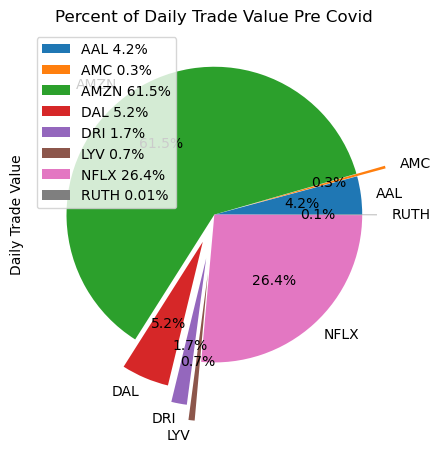

In [12]:
            # pre covid pie chart
explode = (0,0.2,0,0.2,0.3,0.4,0,0.1)
precovid_df.groupby(['Ticker']).sum().plot(kind='pie', explode =explode, autopct='%.1f%%',
                                            y='Daily Trade Value')
plt.title("Percent of Daily Trade Value Pre Covid")
labels =["AAL 4.2%",'AMC 0.3%', 'AMZN 61.5%','DAL 5.2%','DRI 1.7%','LYV 0.7%','NFLX 26.4%','RUTH 0.01%']
plt.legend( loc='best', labels=labels)
plt.show()

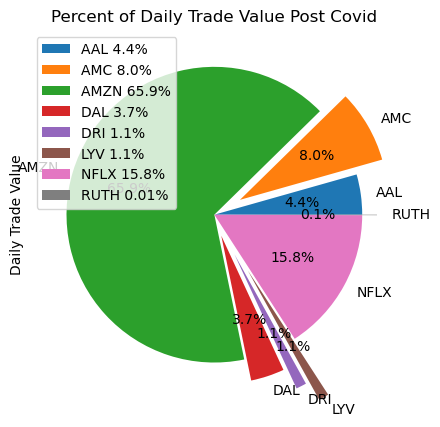

In [11]:
explode = (0,0.2,0,0.15,0.3,0.44,0,0.1)

postcovid_df.groupby(['Ticker']).sum().plot(kind='pie', explode =explode, autopct='%.1f%%',
                                            y='Daily Trade Value')
plt.title("Percent of Daily Trade Value Post Covid")
labels =["AAL 4.4%",'AMC 8.0%', 'AMZN 65.9%','DAL 3.7%','DRI 1.1%','LYV 1.1%','NFLX 15.8%','RUTH 0.01%']
plt.legend( loc='best', labels=labels)

plt.show()